In [1]:
%%bash 
which python

/global/project/projectdirs/atlas/xju/miniconda3/envs/py3.6/bin/python


In [2]:
import sys
sys.path.append('..')
from nx_graph.utils_test import create_trained_model
from nx_graph.utils_test import plot_metrics

In [3]:
config_file = '../configs/nxgraph_default.yaml'
model = create_trained_model(config_file)

In [4]:
iteration = 2767

In [5]:
odd, tdd = model(iteration)

INFO:tensorflow:Restoring parameters from /global/homes/x/xju/track/gnn/code/gnn_networkx/trained_results/nxgraph_small_001/checkpoint_02767.ckpt


Accuracy:  0.9560
Precision: 0.9265
Recall:    0.8890


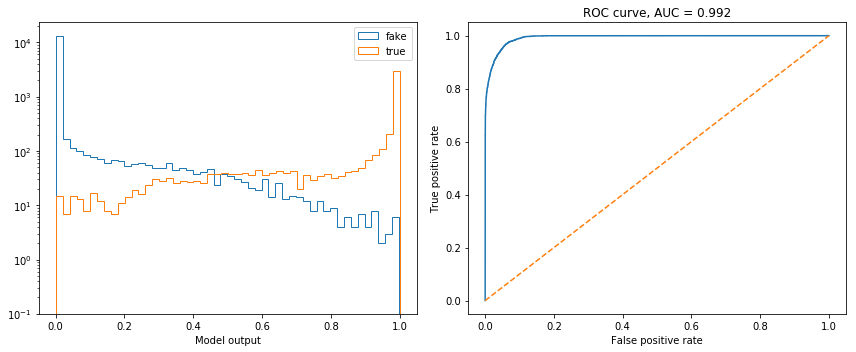

In [6]:
plot_metrics(odd, tdd, odd_th=0.5)

INFO:tensorflow:Restoring parameters from /global/homes/x/xju/track/gnn/code/gnn_networkx/trained_results/nxgraph_small_seq_onehot_001/checkpoint_03558.ckpt
Accuracy:  0.9384
Precision: 0.8579
Recall:    0.8588


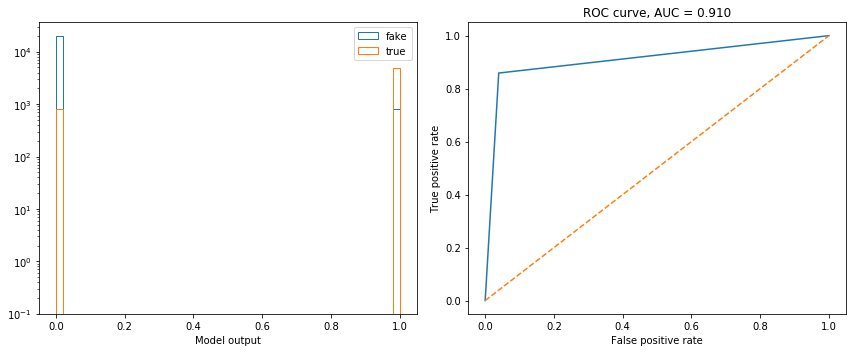

In [43]:
iteration = 3558
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)